In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_style('darkgrid')
plt.rcParams['font.size']=15
plt.rcParams['figure.figsize']=(13,7)

In [15]:
raw_data=pd.read_csv('churn_data.csv')

In [16]:
raw_data

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...
7037,2569-WGERO,72,Yes,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No
7038,6840-RESVB,24,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,72,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,11,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


In [22]:
raw_data.isnull().sum()

customerID          0
tenure              0
PhoneService        0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [23]:
raw_data.describe()

,tenure,MonthlyCharges
count,7042.000000,7042.000000
mean,32.366373,64.755886
std,24.557955,30.088238
min,0.000000,18.250000
25%,9.000000,35.500000
50%,29.000000,70.350000
75%,55.000000,89.850000
max,72.000000,118.750000


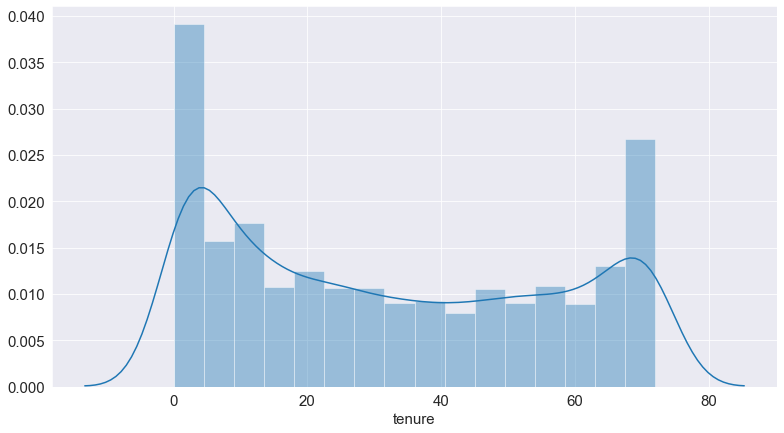

In [34]:
sns.distplot(raw_data['tenure'])

In [35]:
raw_data.Contract.value_counts()

Month-to-month    3875
Two year          1694
One year          1473
Name: Contract, dtype: int64

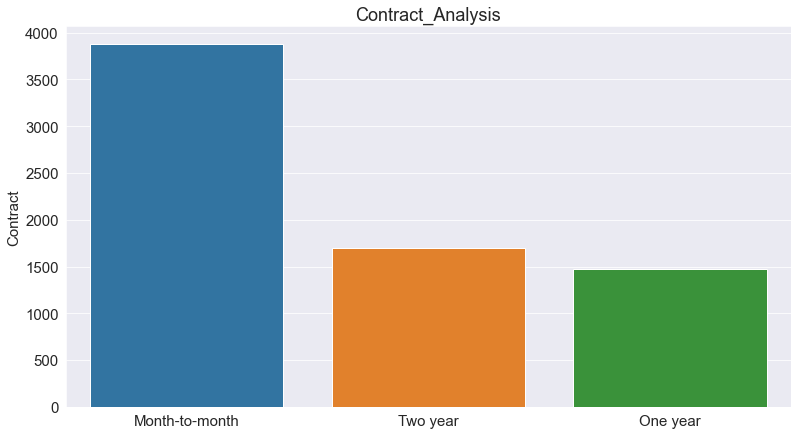

In [46]:
plt.title('Contract_Analysis')
sns.barplot(x=raw_data.Contract.value_counts().index,y=raw_data.Contract.value_counts())

In [37]:
raw_data.PaperlessBilling.value_counts()

Yes    4170
No     2872
Name: PaperlessBilling, dtype: int64

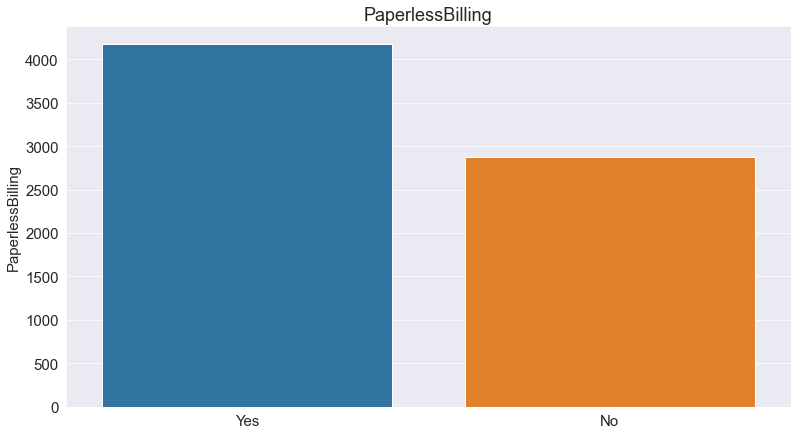

In [45]:
plt.title('PaperlessBilling')
sns.barplot(x=raw_data.PaperlessBilling.value_counts().index,y=raw_data.PaperlessBilling.value_counts())

In [47]:
raw_data.PaymentMethod.value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1543
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

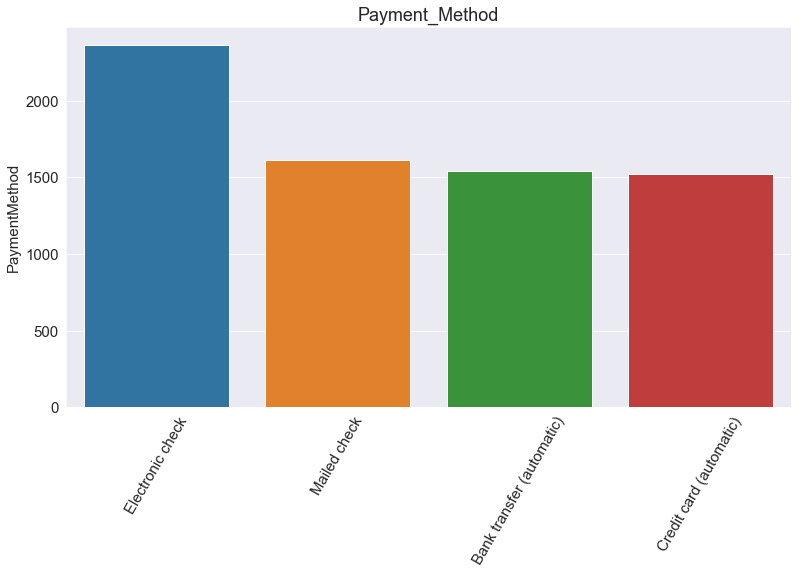

In [49]:
plt.title('Payment_Method')
plt.xticks(rotation=60)
sns.barplot(x=raw_data.PaymentMethod.value_counts().index,y=raw_data.PaymentMethod.value_counts())

In [68]:
raw_data.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [70]:
x=raw_data[['tenure','MonthlyCharges']]
y=raw_data['Churn']

In [71]:
from sklearn.model_selection import train_test_split

In [97]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

In [98]:
from sklearn.svm import SVC

In [99]:
svc= SVC()

In [100]:
svc.fit(x_train,y_train)

SVC()

In [101]:
y_pred=svc.predict(x_test)

In [102]:
y_pred.shape

(1761,)

In [103]:
y_test

2207    Yes
5104     No
1751    Yes
4108     No
644      No
       ... 
3637    Yes
1040    Yes
2887    Yes
6790     No
25       No
Name: Churn, Length: 1761, dtype: object

In [118]:
svc.score(x_train,y_train) #accuracy of training set

0.7824275705358834

In [119]:
svc.score(x_test,y_test) # accuracy of test set

0.8080636002271436

In [105]:
from sklearn.metrics import confusion_matrix

In [106]:
confusion_matrix(y_pred,y_test)

array([[1227,  274],
       [  64,  196]], dtype=int64)

In [108]:
#for Accuracy

(1227+196)/(1227+196+64+274)

0.8080636002271436